In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\samvi\Documents\Coding Projects\Embedded Work\Data\MSA_HPI (All transactions, not seasonally adjusted).csv', header=None)
df.columns = ['MSA Name', 'MSA Code', 'Year', 'Quarter', 'HPI', 'Unknown']

In [3]:
df['HPI'] = pd.to_numeric(df['HPI'], errors='coerce')
df['MSA Code'] = pd.to_numeric(df['MSA Code'], errors='coerce')

In [4]:
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}
df['Month'] = df['Quarter'].map(quarter_to_month)
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

In [5]:
df.head()

,MSA Name,MSA Code,Year,Quarter,HPI,Unknown,Month,Date
0,"Abilene, TX",10180,1975,1,NaN,-,1,1975-01-01
1,"Abilene, TX",10180,1975,2,NaN,-,4,1975-04-01
2,"Abilene, TX",10180,1975,3,NaN,-,7,1975-07-01
3,"Abilene, TX",10180,1975,4,NaN,-,10,1975-10-01
4,"Abilene, TX",10180,1976,1,NaN,-,1,1976-01-01


In [6]:
def hpi_vol(df, date_col="Date", hpi_col="HPI", annualise=True):
    """
    Quarterly HPI volatility (sample stdev of simple returns).

    Parameters
    ----------
    df           : DataFrame with at least `date_col` and `hpi_col`
    date_col     : name of the date column (used only for sorting)
    hpi_col      : name of the HPI level column
    annualise    : multiply by √4 to express as annual volatility

    Returns
    -------
    float
    """
    # 1. Put rows in time order, grab the HPI level
    hpi = df.sort_values(date_col)[hpi_col].astype(float)

    # 2. Turn levels into simple %-change quarterly returns
    #q_ret = hpi.pct_change().dropna()
    q_ret = hpi.pct_change(fill_method=None).dropna()

    # 3. Sample standard deviation of those returns
    vol = q_ret.std(ddof=1)

    # 4. Scale up to annual if desired
    return vol * np.sqrt(4) if annualise else vol

In [7]:
results = {}
vols = []
for code in df['MSA Code'].unique():
    df_msa = df[df['MSA Code'] == code]
    result = hpi_vol(df_msa)
    results[code] = result
    vols.append(result)
print(results)

{np.int64(10180): np.float64(0.06376872742869745), np.int64(10420): np.float64(0.04253307109305292), np.int64(10500): np.float64(0.04271005046652267), np.int64(10540): np.float64(0.0599732006758326), np.int64(10580): np.float64(0.052775493398816944), np.int64(10740): np.float64(0.05180681000625275), np.int64(10780): np.float64(0.04526169226530151), np.int64(10900): np.float64(0.05637992995635747), np.int64(11020): np.float64(0.0460443484934806), np.int64(11100): np.float64(0.06152049180403236), np.int64(11180): np.float64(0.036975735449655385), np.int64(11200): np.float64(0.04652763294848104), np.int64(11244): np.float64(0.06347948884961448), np.int64(11260): np.float64(0.06966733035996613), np.int64(11460): np.float64(0.04636365511954396), np.int64(11500): np.float64(0.04690062146935807), np.int64(11540): np.float64(0.026487453226272616), np.int64(11694): np.float64(0.053540242268870754), np.int64(11700): np.float64(0.035896985465150556), np.int64(12020): np.float64(0.0352603345612240

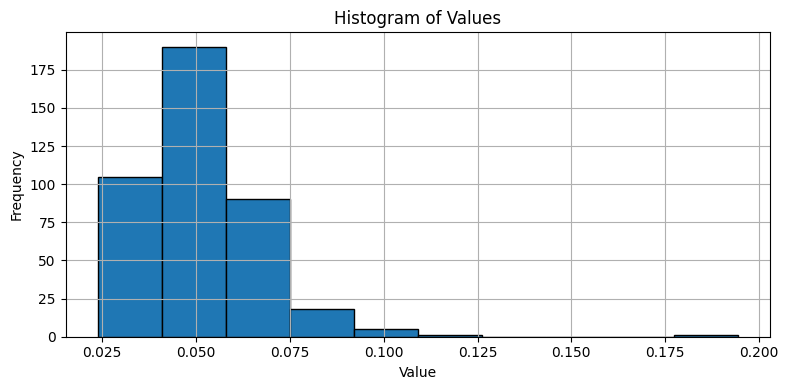

In [8]:
# Plot histogram
plt.figure(figsize=(8, 4))
plt.hist(vols, bins=10, edgecolor='black')
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

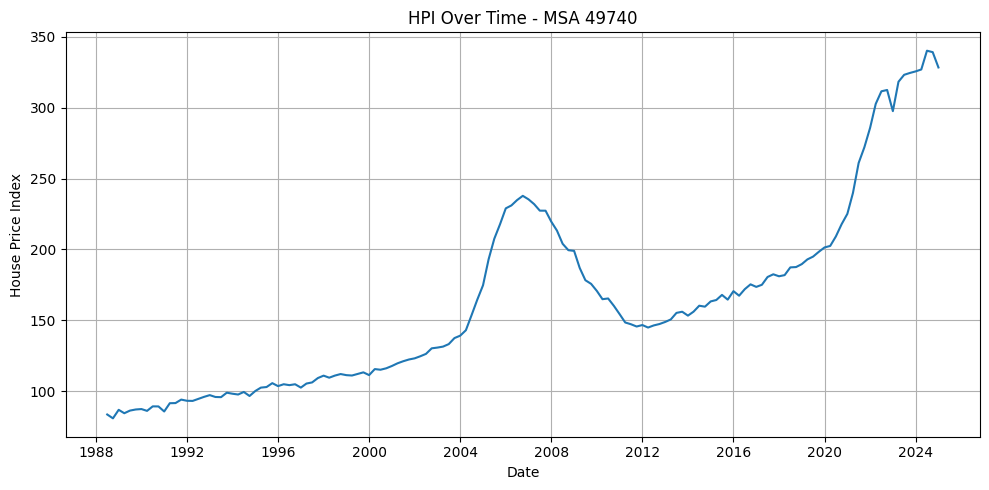

In [9]:
target_msa = 49740  # Replace with actual code
df_msa = df[df['MSA Code'] == target_msa]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_msa['Date'], df_msa['HPI'])
plt.title(f'HPI Over Time - MSA {target_msa}')
plt.xlabel('Date')
plt.ylabel('House Price Index')
plt.grid(True)
plt.tight_layout()
plt.show()

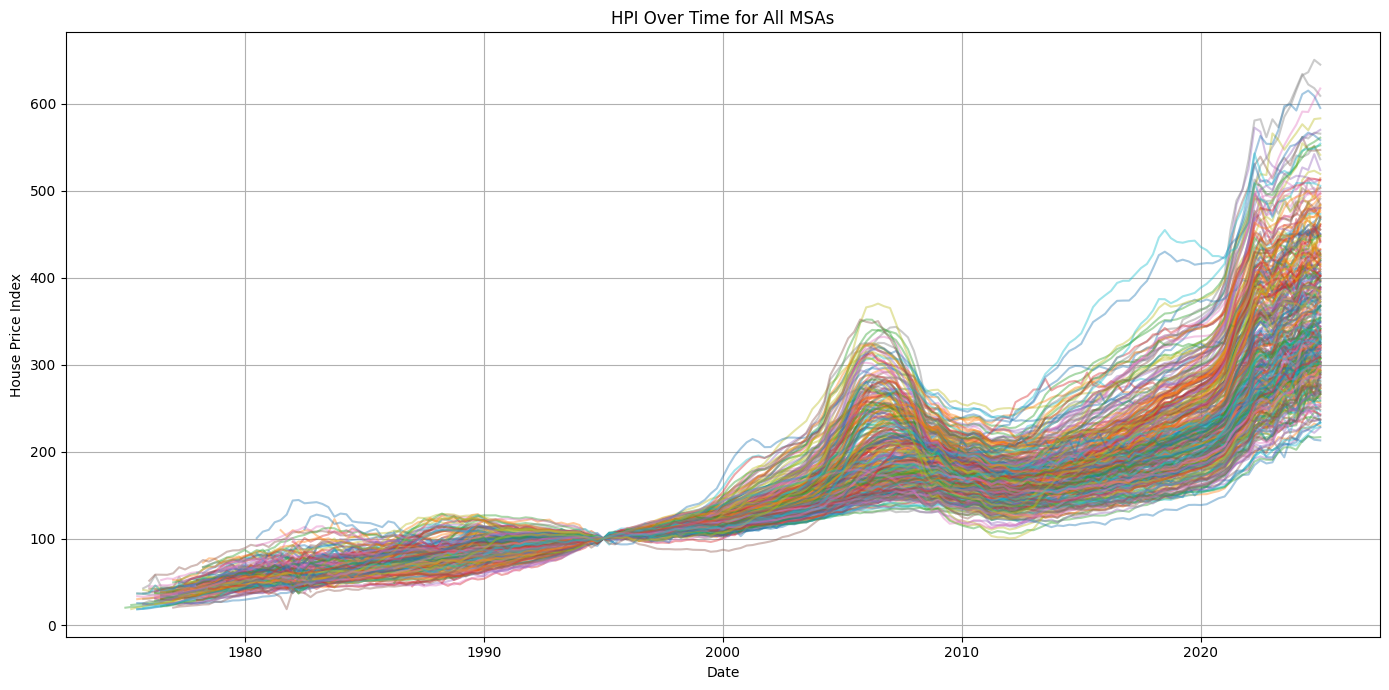

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

# Set up the plot
plt.figure(figsize=(14, 7))

# Loop through each MSA and plot its HPI time series
for msa_code in df['MSA Code'].unique():
    df_msa = df[df['MSA Code'] == msa_code]
    plt.plot(df_msa['Date'], df_msa['HPI'], label=f'MSA {msa_code}', alpha=0.4)

plt.title('HPI Over Time for All MSAs')
plt.xlabel('Date')
plt.ylabel('House Price Index')
plt.grid(True)
plt.tight_layout()

# Optional: if too many labels, comment out or adjust
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.show()

In [8]:
df_names = pd.read_csv(r'C:\Users\samvi\Documents\Coding Projects\Embedded Work\Data\MSA Naming Conventions.csv')

df_names = df_names[df_names["Metropolitan/Micropolitan Statistical Area"] == "Metropolitan Statistical Area"]
df_names = df_names[["CBSA Code", "CBSA Title", "FIPS State Code"]]
df_names = df_names.drop_duplicates(subset="CBSA Code", keep="first")

In [9]:
filtered_df = df[df['MSA Code'].isin(df_names['CBSA Code'])]

In [11]:
filtered_df['MSA Code'].nunique()

373

# US Data

In [23]:
df = pd.read_csv(r'C:\Users\samvi\Documents\Coding Projects\Embedded Work\Data\US_HPI (All transactions, not seasonally adjusted).csv', header=None)
df.columns = ['Source', 'Year', 'Quarter', 'HPI']
df = df[df['Source'] == 'USA']

In [24]:
df.head()

,Source,Year,Quarter,HPI
1809,USA,1975,1,59.78
1810,USA,1975,2,60.74
1811,USA,1975,3,61.02
1812,USA,1975,4,62.19
1813,USA,1976,1,62.73


In [25]:
df['Source'].value_counts()

Source
USA    201
Name: count, dtype: int64

In [26]:
hpi_1995_q1 = df.loc[(df['Year'] == 1995) & (df['Quarter'] == 1), 'HPI'].values[0]

In [27]:
df['HPI'] = (df['HPI'] / hpi_1995_q1) * 100

In [28]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + 'Q' + df['Quarter'].astype(str))


C:\Users\samvi\AppData\Local\Temp\ipykernel_11232\2690573200.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + 'Q' + df['Quarter'].astype(str))


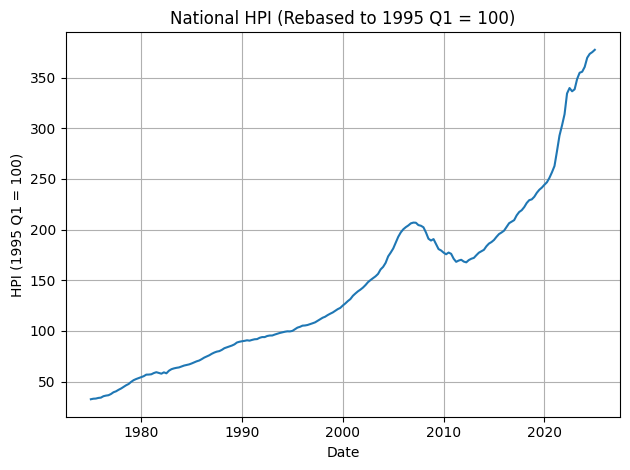

In [29]:
plt.plot(df['Date'], df['HPI'])
plt.title('National HPI (Rebased to 1995 Q1 = 100)')
plt.ylabel('HPI (1995 Q1 = 100)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def hpi_vol(df, date_col="Date", hpi_col="HPI", annualise=True):
    """
    Quarterly HPI volatility (sample stdev of simple returns).

    Parameters
    ----------
    df           : DataFrame with at least `date_col` and `hpi_col`
    date_col     : name of the date column (used only for sorting)
    hpi_col      : name of the HPI level column
    annualise    : multiply by √4 to express as annual volatility

    Returns
    -------
    float
    """
    # 1. Put rows in time order, grab the HPI level
    hpi = df.sort_values(date_col)[hpi_col].astype(float)

    # 2. Turn levels into simple %-change quarterly returns
    q_ret = hpi.pct_change().dropna()

    # 3. Sample standard deviation of those returns
    vol = q_ret.std(ddof=1)

    # 4. Scale up to annual if desired
    return vol * np.sqrt(4) if annualise else vol

In [34]:
hpi_vol(df[['Date', 'HPI']])

np.float64(0.02775469782350957)

np.float64(83.33773001898146)